In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
df= pd.read_csv(r"D:\DATA ANALYTICS\POWER BI\PROJECT\civid 19\owid-covid-data.csv")


In [9]:
pd.set_option("display.max.columns", 100)

In [10]:
df.drop(columns= ["excess_mortality_cumulative_absolute",	"excess_mortality_cumulative",	"excess_mortality",	"excess_mortality_cumulative_per_million"], inplace= True)

In [11]:
df['Year']= df['date'].astype(str).str[:4]

In [12]:
df['date']= pd.to_datetime(df['date'])

In [13]:
df.sort_values(by= "Year", ascending= True). reset_index(drop= True)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Year
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,2020
1,LBR,Africa,Liberia,2020-10-02,1343.0,0.0,0.714,82.0,0.0,0.000,259.256,0.000,0.138,15.829,0.000,0.000,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.19,5180208.0,49.127,19.2,3.057,1.756,752.788,38.6,272.509,2.42,1.5,18.1,1.188,0.80,64.10,0.480,2020
2,LBR,Africa,Liberia,2020-10-01,1343.0,4.0,0.857,82.0,0.0,0.000,259.256,0.772,0.165,15.829,0.000,0.000,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.19,5180208.0,49.127,19.2,3.057,1.756,752.788,38.6,272.509,2.42,1.5,18.1,1.188,0.80,64.10,0.480,2020
3,LBR,Africa,Liberia,2020-09-30,1339.0,0.0,0.429,82.0,0.0,0.000,258.484,0.000,0.083,15.829,0.000,0.000,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.19,5180208.0,49.127,19.2,3.057,1.756,752.788,38.6,272.509,2.42,1.5,18.1,1.188,0.80,64.10,0.480,2020
4,LBR,Africa,Liberia,2020-09-29,1339.0,0.0,0.429,82.0,0.0,0.000,258.484,0.000,0.083,15.829,0.000,0.000,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.19,5180208.0,49.127,19.2,3.057,1.756,752.788,38.6,272.509,2.42,1.5,18.1,1.188,0.80,64.10,0.480,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,ITA,Europe,Italy,2022-02-02,11235745.0,119323.0,121740.571,147320.0,395.0,364.286,186122.506,1976.611,2016.658,2440.387,6.543,6.034,0.75,1524.0,25.245,21074.0,349.095,787.0,13.037,9241.0,153.079,964521.0,172843235.0,2863.185,15.977,942646.0,15.615,0.1291,7.7,tests performed,129200150.0,50261952.0,46238452.0,34206025.0,388364.0,452354.0,214.02,83.26,76.59,56.66,7493.0,38451.0,0.064,76.85,60367471.0,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,2022
166322,ITA,Europe,Italy,2022-02-03,11348701.0,112956.0,115585.714,147734.0,414.0,367.857,187993.646,1871.140,1914.702,2447.245,6.858,6.094,0.74,1457.0,24.136,20781.0,344.242,757.0,12.540,9041.0,149.766,915337.0,173758572.0,2878.348,15.163,924872.0,15.321,0.1250,8.0,tests performed,129561493.0,50290363.0,46296336.0,3448

In [14]:
df.loc[:,['continent','total_cases','total_deaths','Year']]

,continent,total_cases,total_deaths,Year
0,Asia,5.0,NaN,2020
1,Asia,5.0,NaN,2020
2,Asia,5.0,NaN,2020
3,Asia,5.0,NaN,2020
4,Asia,5.0,NaN,2020
...,...,...,...,...
166321,Africa,236871.0,5395.0,2022
166322,Africa,237503.0,5396.0,2022
166323,Africa,237503.0,5396.0,2022
166324,Africa,238739.0,5397.0,2022


In [15]:
df.dropna(subset= 'continent', inplace= True)

In [16]:
df.sort_values(by= 'total_cases', ascending= False).reset_index(drop= True)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Year
0,USA,North America,United States,2022-03-05,79265726.0,15217.0,47989.857,958437.0,293.0,1425.714,238095.936,45.708,144.150,2878.923,0.880,4.283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,554868239.0,254002347.0,215274110.0,94925621.0,0.0,148251.0,167.12,76.50,64.84,28.59,447.0,39094.0,0.012,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,2022
1,USA,North America,United States,2022-03-04,79250509.0,54501.0,52764.286,958144.0,1883.0,1497.857,238050.227,163.708,158.492,2878.043,5.656,4.499,NaN,6203.0,18.632,30560.0,91.795,NaN,NaN,28778.0,86.442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,554868239.0,254002347.0,215274110.0,94925621.0,26230.0,180572.0,167.12,76.50,64.84,28.59,544.0,48110.0,0.014,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,2022
2,USA,North America,United States,2022-03-03,79196008.0,52292.0,55673.857,956261.0,1743.0,1553.714,237886.519,157.073,167.231,2872.387,5.236,4.667,NaN,7015.0,21.071,34108.0,102.453,NaN,NaN,29613.0,88.951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,554842009.0,253995527.0,215266826.0,94914378.0,149279.0,228576.0,167.12,76.50,64.84,28.59,688.0,60181.0,0.018,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,2022
3,USA,North America,United States,2022-03-02,79143716.0,52355.0,57824.857,954518.0,2095.0,1725.000,237729.446,157.262,173.693,2867.152,6.293,5.182,0.59,6993.0,21.005,34699.0,104.228,NaN,NaN,30821.0,92.579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,554692730.0,253956787.0,215226511.0,94847407.0,217200.0,250409.0,167.07,76.49,64.83,28.57,754.0,65798.0,0.020,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,2022
4,USA,North America,United States,2022-03-01,79091361.0,47031.0,62331.429,952423.0,1691.0,1830.000,237572.183,141.270,187.229,2860.859,5.079,5.497,0.59,7314.0,21.970,36214.0,108.778,NaN,NaN,32132.0,96.517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,554475530.0,253899142.0,215166280.0,94753028.0,241635.0,264689.0,167.01,76.47,64.81,28.54,797.0,69472.0,0.021,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156365,TUV,Oceania,Tuvalu,2021-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,2516.0,0.0

In [65]:
df.dropna(subset= 'total_vaccinations', inplace= True)

In [67]:
df.dropna(subset= 'total_cases', inplace= True)

In [71]:
df.reset_index(drop= True)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Year
0,AFG,Asia,Afghanistan,2021-02-22,55617.0,13.0,14.714,2433.0,1.0,0.857,1396.169,0.326,0.369,61.076,0.025,0.022,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,12.04,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2021
1,AFG,Asia,Afghanistan,2021-02-28,55714.0,7.0,15.714,2443.0,0.0,1.571,1398.604,0.176,0.394,61.327,0.000,0.039,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8200.0,8200.0,NaN,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0,1367.0,0.003,12.04,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2021
2,AFG,Asia,Afghanistan,2021-03-16,55995.0,10.0,17.000,2460.0,1.0,1.286,1405.658,0.251,0.427,61.754,0.025,0.032,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54000.0,54000.0,NaN,NaN,NaN,2862.0,0.14,0.14,NaN,NaN,72.0,2862.0,0.007,30.56,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2021
3,AFG,Asia,Afghanistan,2021-04-07,56873.0,94.0,59.857,2512.0,0.0,4.000,1427.699,2.360,1.503,63.059,0.000,0.100,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120000.0,120000.0,NaN,NaN,NaN,3000.0,0.30,0.30,NaN,NaN,75.0,3000.0,0.008,26.85,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2021
4,AFG,Asia,Afghanistan,2021-04-22,58312.0,98.0,111.143,2561.0,4.0,4.000,1463.823,2.460,2.790,64.290,0.100,0.100,1.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240000.0,240000.0,NaN,NaN,NaN,8000.0,0.60,0.60,NaN,NaN,201.0,8000.0,0.020,26.85,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39662,ZWE,Africa,Zimbabwe,2022-02-28,236380.0,577.0,401.286,5395.0,2.0,1.286,15662.425,38.232,26.589,357.470,0.133,0.085,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4299.0,0.285,0.0933,10.7,tests performed,7890951.0,4362150.0,3396655.0,132146.0,8707.0,8836.0,52.29,28.90,22.51,0.88,585.0,2861.0,0.019,50.00,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,2022
39663,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,15694.959,32.533,27.365,357.470,0.000,0.066,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4063.0,0.269,0.1016,9.8,tests performed,7901360.0,4365856.0,3399915.0,135589.0,10409.0,929

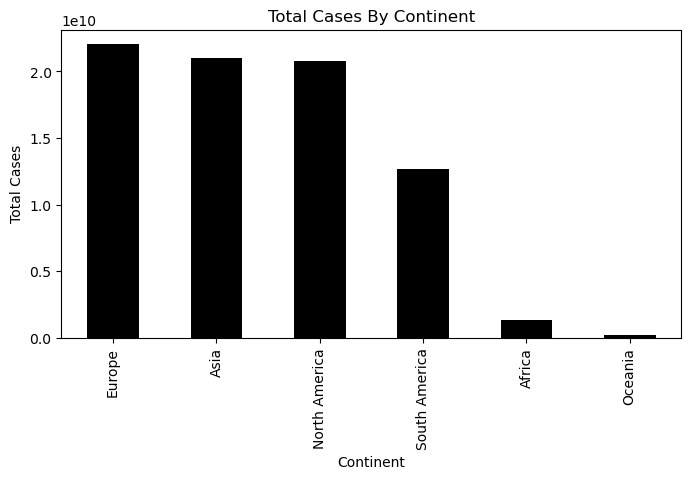

In [235]:
Total_cases_by_continent= df.groupby('continent')['total_cases'].sum().sort_values(ascending= False)

Total_cases_by_continent.plot(kind='bar', color= 'black', figsize= (8,4))
plt.title('Total Cases By Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.show()

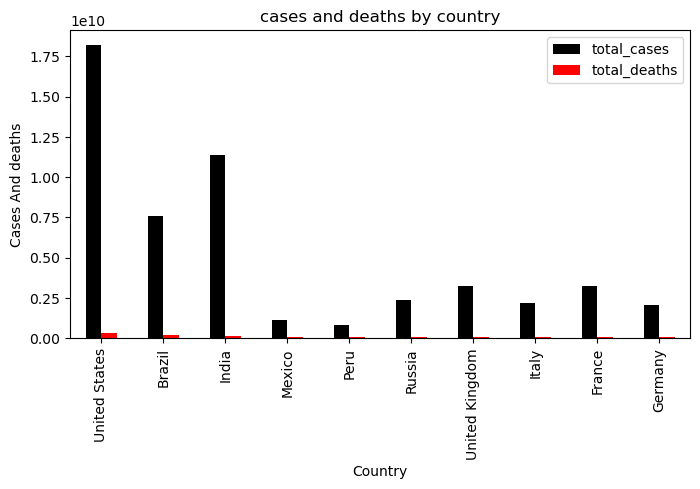

In [233]:
cases_and_deaths_by_countries= df.groupby('location')[['total_cases','total_deaths']].sum().sort_values(by= ['total_deaths'], ascending=False).head(10)

cases_and_deaths_by_countries.plot(kind= 'bar', color=['black','red'], figsize= (8,4))
plt.title('cases and deaths by country')
plt.xlabel('Country')
plt.ylabel('Cases And deaths')
plt.show()

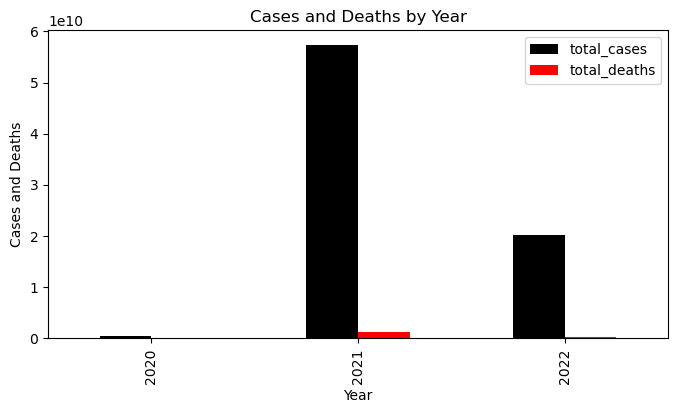

In [159]:
cases_and_death_by_year= df.groupby('Year')[['total_cases', 'total_deaths']].sum()

cases_and_death_by_year.plot(kind= "bar", color= ['black','red'], figsize=(8,4))
plt.title('Cases and Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Cases and Deaths')
plt.show()

In [102]:
df['total_deaths']= df['total_deaths'].fillna(df['total_deaths'].mean())

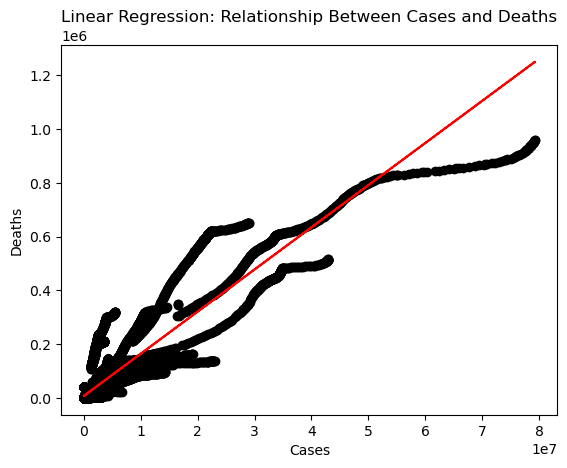

In [217]:
x= df[['total_cases']]
y= df['total_deaths']

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

lr= LinearRegression()

lr.fit(x_train, y_train)

prd= lr.predict(x_test)


plt.scatter(x, y, color= 'black')
plt.plot(x_test, prd, color= 'red')
plt.title('Linear Regression: Relationship Between Cases and Deaths')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.show()



In [273]:
deaths_in_india= df[df['location'] == 'India']
deaths_in_india.groupby('location')['total_deaths'].sum()

location
India    147638153.0
Name: total_deaths, dtype: float64